In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [31]:
# data is in csv, the first line has the column names, import it as a dataframe
def read_data(path: str):
    data = pd.read_csv(path)
    # print test name
    print("Test name is:",data["session_test_id"][0])
    # count and print the number of unique values in the column "session_uuid"
    print("Number of evaluators is:",data["session_uuid"].nunique())
    # print keys of the dataframe
    print("Available information is:",data.keys())
    return data

# keys are: session_test_id,email,age,gender,musical_training_years,session_uuid,trial_id,rating_stimulus,rating_score,rating_time,rating_comment
# each evaluator has a unique session_uuid
# analyze evaluators
def analyze_evaluators(data):
    # Count the number of unique evaluators
    num_evaluators = data['session_uuid'].nunique()
    # Count the number of unique male evaluators
    num_male_evaluators = data[data['gender'] == 'male']['session_uuid'].nunique()
    # Count the number of unique female evaluators
    num_female_evaluators = data[data['gender'] == 'female']['session_uuid'].nunique()
    print(f"We have {num_male_evaluators} male evaluators and {num_female_evaluators} female evaluators out of {num_evaluators} unique evaluators.")

    # Calculate the average age
    avg_age = data['age'].mean(skipna=True)
    print(f"The average age of evaluators is {avg_age:.2f} years.")
    # Calculate the average years of musical training, ignoring non-numeric values
    avg_training_years = pd.to_numeric(data['musical_training_years'], errors='coerce').mean(skipna=True)
    print(f"The average years of musical training of the evaluators is {avg_training_years:.2f} years.")

    # Find the oldest and youngest evaluators
    oldest_evaluator = data.loc[data['age'].idxmax()]
    youngest_evaluator = data.loc[data['age'].idxmin()]

    # Count the number of evaluators with less than 5 years of musical training
    num_less_than_5_years = (pd.to_numeric(data['musical_training_years'], errors='coerce') < 5).sum()

    print(f"The oldest evaluator is {oldest_evaluator['email']} (age {oldest_evaluator['age']}), and the youngest evaluator is {youngest_evaluator['email']} (age {youngest_evaluator['age']}).")
    print(f"{num_inexperienced_evaluators} evaluators have less than 5 years of musical training.")

    # Count the number of evaluators with emails ending in "@ircam.fr" or "@atiam.fr"
    ircam_evaluators = data[data['email'].str.endswith('@ircam.fr')]['email'].unique()
    atiam_evaluators = data[data['email'].str.endswith('@atiam.fr')]['email'].unique()
    num_ircam_evaluators = len(ircam_evaluators)
    num_atiam_evaluators = len(atiam_evaluators)
    print(f"{num_ircam_evaluators} evaluators have emails ending in '@ircam.fr'.")
    if num_ircam_evaluators > 0:
        print("Their names are:")
        print("\n".join(ircam_evaluators))
    print(f"{num_atiam_evaluators} evaluators have emails ending in '@atiam.fr'.")
    if num_atiam_evaluators > 0:
        print("Their names are:")
        print("\n".join(atiam_evaluators))




i=1
filename = "../results/p3s_atiam"+str(i)+"/mushra.csv"
data = read_data(filename)
analyze_evaluators(data)


Test name is: P3S_ATIAM1
Number of evaluators is: 6
Available information is: Index(['session_test_id', 'email', 'age', 'gender', 'musical_training_years',
       'session_uuid', 'trial_id', 'rating_stimulus', 'rating_score',
       'rating_time', 'rating_comment'],
      dtype='object')
We have 4 male evaluators and 2 female evaluators out of 6 unique evaluators.
The average age of evaluators is 27.33 years.
The average years of musical training of the evaluators is 8.00 years.


TypeError: '<' not supported between instances of 'str' and 'int'

In [3]:


def get_data_for_subject(data, subject):
    sub_data = data[subject]
    return sub_data

def stats(data, type):
    if type is str:
        return pd.value_counts(data).values
    return data.mean(), data.std(), len(data)

def scale(data, min, max, total_data):
    scaled_data = (data - min) / (max - min)
    if scaled_data[scaled_data > 1] is not []:
        print("Some scores are beyond maximum")
        print(total_data[scaled_data > 1])
    if scaled_data[scaled_data < 0] is not []:
        print("Some scores are below minimum")
        print(total_data[scaled_data < 0])
    return scaled_data

def retrieve_experiment_data(data, experiment):
    return data[data["trial_id"] == experiment]

def retrieve_stimulus_data(data, stimulus):
    return data[data["rating_stimulus"] == stimulus]

def make_stats(data):
    rating_stats = (
        "Rating",
        stats(data["rating_score"], float),
    )
    gender_stats = ("Gender", stats(data["gender"], str))
    age_stats = ("Age", stats(data["age"], float))
    time_stats = ("Time", stats(data["rating_time"], float))
    musical_experience_stats = (
        "Musical experience",
        stats(data["musical_training_years"], str),
    )
    return rating_stats, gender_stats, age_stats, time_stats, musical_experience_stats

def plot_stats(stats, stimuli, experiment, ax: plt.Axes):
    text = f"Stimulus: {stimuli}, Experiment: {experiment}\n"
    for stat in stats:
        text += f"{stat[0]}: {stat[1]}\n"
    text += "\n\n"
    print(text)

def walk_through_experiments(data, experiments, stimuli):
    data_experiments = []
    n_experiment, n_stimuli = len(experiments), len(stimuli)
    fig, axs = plt.subplots(n_experiment, n_stimuli)
    for e in experiments:
        data_experiments.append(retrieve_experiment_data(data, e))
    for i, s in enumerate(stimuli):
        for j, data in enumerate(data_experiments):
            e = experiments[j]
            stats = make_stats(data)
            plot_stats(stats, s, e, axs[j, i])

[60 40]
Some scores are beyond maximum
Empty DataFrame
Columns: [session_test_id, email, age, gender, musical_training_years, session_uuid, trial_id, rating_stimulus, rating_score, rating_time, rating_comment]
Index: []
Some scores are below minimum
   session_test_id                       email  age  gender  \
27      P3S_ATIAM0       leo.raybois@gmail.com   24    male   
29      P3S_ATIAM0       leo.raybois@gmail.com   24    male   
34      P3S_ATIAM0       leo.raybois@gmail.com   24    male   
39      P3S_ATIAM0       leo.raybois@gmail.com   24    male   
41      P3S_ATIAM0      welshwitch66@gmail.com   57  female   
44      P3S_ATIAM0      welshwitch66@gmail.com   57  female   
60      P3S_ATIAM0          anarkush@gmail.com   33  female   
74      P3S_ATIAM0          anarkush@gmail.com   33  female   
77      P3S_ATIAM0          anarkush@gmail.com   33  female   
79      P3S_ATIAM0          anarkush@gmail.com   33  female   
96      P3S_ATIAM0  Yves_desvallees@orange.fr    58    ma

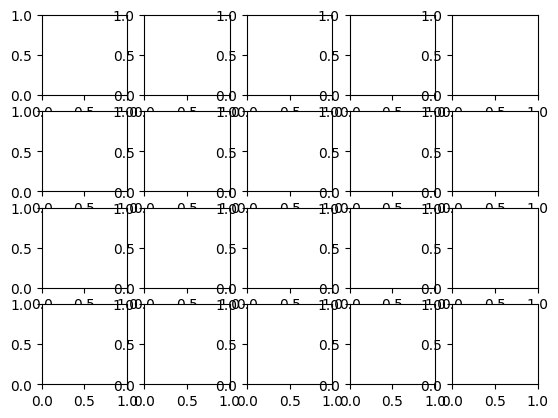

In [8]:
for i in range(5):
    filename = "../results/p3s_atiam"+str(i)+"/mushra.csv"
    data, keys, experiment_names, stimuli = read_data(filename)
# print(f"Columns: {keys}\nExperiments: {experiment_names}\nStimuli: {stimuli}\n\n\n")
str_data = get_data_for_subject(data, "gender")
num_data = get_data_for_subject(data, "rating_score")
print(stats(str_data, str))
print(scale(num_data, 20, 100, data))

data_experiment_0 = retrieve_experiment_data(data, experiment_names[0])
print(data_experiment_0)

data_stimulus_0 = retrieve_stimulus_data(data_experiment_0, stimuli[0])
print(data_stimulus_0[['gender', 'rating_score']])

walk_through_experiments(data, experiment_names, stimuli)